In [ ]:
#Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

# Read in the data
This can be one of two ways:

##1. Google Drive
First mount your google account so you can read data into the virtual machine
Second replace the path with your specific path
* This can be found in the folder on the side of GoogleColab after you mount your Google drive

In [ ]:
# # Mount your google account that has been used to share the data
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Let's read in the HuBMAP dataset (From Hickey et al Nature 2023)
data_path = '/content/drive/MyDrive/Duke/Projects/PanOrgan/datasets/2023_Hickey_Nature/05_25_HuBMAP_tunit.csv'
df_HuBMAP = pd.read_csv(data_path, index_col=0)

<ipython-input-2-343086e8052e>:3: DtypeWarning: Columns (62,63,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df_HuBMAP = pd.read_csv(data_path, index_col=0)


##2. Direct Download Through Host
Get the datafiles from the online Dryad repository

In [ ]:
!wget https://datadryad.org/stash/downloads/file_stream/2572151 -O donor_metadata.csv
!wget https://datadryad.org/stash/downloads/file_stream/2572152 -O 23_09_CODEX_HuBMAP_alldata_Dryad_merged.csv
!wget https://datadryad.org/stash/downloads/file_stream/2572157 -O README.md

In [ ]:
df_HuBMAP = pd.read_csv('23_09_CODEX_HuBMAP_alldata_Dryad_merged.csv')

# Explore the data
Now we will do a few simple things within pandas to explore the data we have loaded in

In [ ]:
# Check the dimensions of the dataset (rows x columns)
# This gives you an idea of the dataset's size
print("Dimensions of the dataset:")
print(df_HuBMAP.shape)

Dimensions of the dataset:
(2512002, 79)


In [ ]:
# What columns are there for the rows?
print("Column names:")
df_HuBMAP.columns

Column names:


Index(['MUC2', 'SOX9', 'MUC1', 'CD31', 'Synapto', 'CD49f', 'CD15', 'CHGA',
       'CDX2', 'ITLN1', 'CD4', 'CD127', 'Vimentin', 'HLADR', 'CD8', 'CD11c',
       'CD44', 'CD16', 'BCL2', 'CD3', 'CD123', 'CD38', 'CD90', 'aSMA', 'CD21',
       'NKG2D', 'CD66', 'CD57', 'CD206', 'CD68', 'CD34', 'aDef5', 'CD7',
       'CD36', 'CD138', 'CD45RO', 'Cytokeratin', 'CD117', 'CD19', 'Podoplanin',
       'CD45', 'CD56', 'CD69', 'Ki67', 'CD49a', 'CD163', 'CD161',
       'first_index', 'x', 'y', 'tissue', 'donor', 'region', 'OLFM4', 'FAP',
       'CD25', 'CollIV', 'CK7', 'Xcorr', 'Ycorr', 'unique_region',
       'neigh_name', 'neigh_sub1', 'Preservation_method', 'Tissue_location',
       'array', 'Cell Type', 'Cell Type em', 'Cell subtype', 'machine', 'MUC6',
       'Neighborhood', 'Neighborhood_Ind', 'Neigh_sub', 'NeighInd_sub',
       'Community', 'Major Community', 'Tissue Segment', 'Tissue Unit'],
      dtype='object')

# Structure of the data
The overall structure of the datasets is individual cells segmented out in each row.

## Marker columns
Columns MUC2 through CD161 are the markers used for clustering the cell types. These are the columns that are the values of the antibody staining the target protein within the tissue quantified at the single-cell level. This value is the per cell/area averaged fluorescent intensity that has subsequently been z normalized along each column as described above.

OLFM4 through MUC6 were captured in the quantification but not used within the clustering of cell types.

## Other columns are as follows:

- **x**: Tissue x position in each region imaged
- **y**: Tissue y position in each region imaged
- **array**: Tissue array from which each region was imaged
- **Xcorr**: Corrected x position in each array imaged
- **Ycorr**: Corrected y position in each array imaged
- **Tissue_location**: Segment of the intestine where the tissue came from
- **tissue**: Whether it was from the small bowel or colon
- **donor**: Which donor the cells came from
- **unique_region**: Label for the unique region from both Tissue_location and donor
- **region**: Number region from initial imaging data
- **Cell Type**: Cell type labels used for the paper analysis
- **Cell Type em**: Cell type labels from a subset of samples where MUC6 was used (B009-B012)
- **Cell subtype**: Major categories of the Cell Type column used for subsetting cell types
- **Neighborhood**: Neighborhood labels from data analyzed all together
- **Neigh_sub**: Major categories of Neighborhood column used for subsetting neighborhoods
- **Neighborhood_Ind**: Neighborhood labels from data analyzed by Tissue_location
- **NeighInd_sub**: Major categories of Neighborhood_Ind column used for subsetting neighborhoods
- **Community**: Community labels from data analyzed all together
- **Major Community**: Major categories of the Community column used for subsetting communities
- **Tissue Segment**: Tissue segment labels for each cell from data analyzed together
- **Tissue Unit**: Tissue unit labels for each cell from data analyzed together (except for two replicate conditions)


In [ ]:
# Explore the first few rows of the dataset to get an overview
# This helps you understand the structure of the data
print("First few rows of the dataset:")
df_HuBMAP.head()

First few rows of the dataset:


,MUC2,SOX9,MUC1,CD31,Synapto,CD49f,CD15,CHGA,CDX2,ITLN1,...,machine,MUC6,Neighborhood,Neighborhood_Ind,Neigh_sub,NeighInd_sub,Community,Major Community,Tissue Segment,Tissue Unit
0,-0.303994,-0.163727,-0.587608,-0.212903,0.164173,-0.664863,0.049305,0.003616,-0.377532,-0.450794,...,NaN,NaN,Mature Epithelial,Mature Epithelial,Epithelial,Epithelial,Plasma Cell Enriched,Immune,Mucosa,Mucosa
1,-0.301927,-0.491706,-0.500804,-0.243205,-0.142568,-0.664861,-0.182627,-0.117573,-0.182754,-0.236199,...,NaN,NaN,Transit Amplifying Zone,Mature Epithelial,Epithelial,Epithelial,Mature Epithelial,Epithelial,Mucosa,Mucosa
2,-0.302206,-0.547234,-0.510705,-0.235309,-0.217185,-0.622758,-0.296486,-0.091504,-0.268055,-0.355383,...,NaN,NaN,Innate Immune Enriched,Innate Immune Enriched,Immune,Immune,Innate Immune Enriched,Immune,Mucosa,Mucosa
3,-0.294644,-0.615593,-0.570580,-0.247548,-0.042246,-0.642230,-0.299031,-0.121458,-0.377533,-0.450797,...,NaN,NaN,Outer Follicle,Outer Follicle,Immune,Immune,Follicle,Immune,Mucosa,Mucosa
4,-0.298609,-0.272162,-0.587607,-0.228376,-0.266695,-0.664864,-0.237499,-0.121460,-0.168489,-0.430944,...,NaN,NaN,Outer Follicle,Outer Follicle,Immune,Immune,Follicle,Immune,Mucosa,Mucosa


# Graphical Interpretations
How can we use different features to understand relationships in our data and inspect what is underlying our data

First look at the different cell percentages averaged across the different regions of the intestine

<Figure size 1000x600 with 0 Axes>

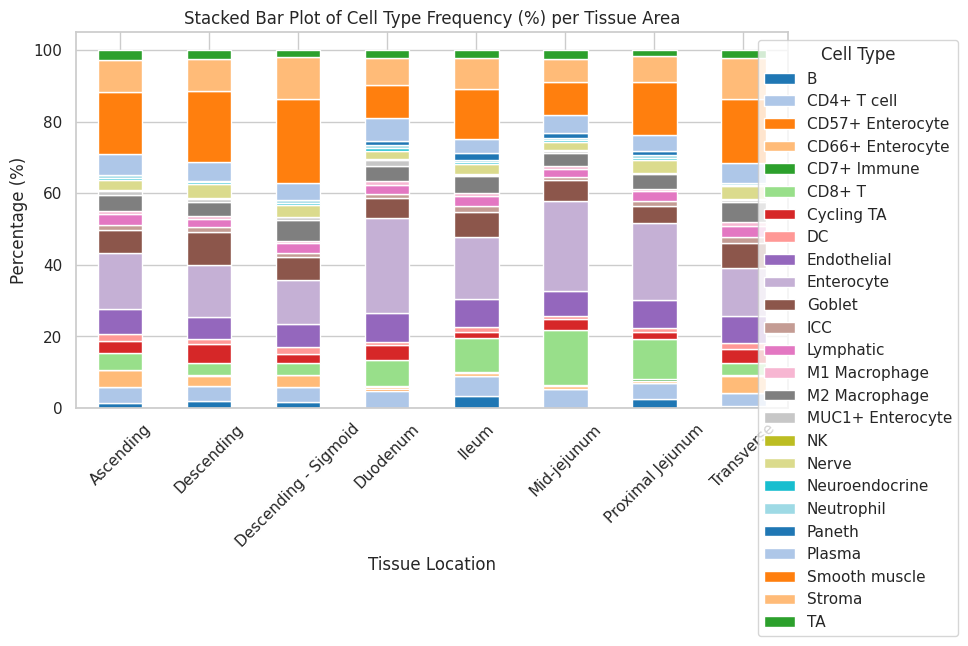

In [ ]:
# Create a pivot table to prepare the data for the stacked bar plot
pivot_df = df_HuBMAP.pivot_table(index='Tissue_location', columns='Cell Type', aggfunc='size', fill_value=0)

# Normalize the data to percentages (each row sums up to 100%)
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Define a larger color palette (Set3 has 12 colors, Set2 has 8)
# You can choose from other palettes such as 'Paired', 'Accent', or 'tab20'
colors = sns.color_palette("tab20", n_colors=len(pivot_df_percent.columns))

# Create a stacked bar plot with percentages and custom colors
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = pivot_df_percent.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))
plt.title("Stacked Bar Plot of Cell Type Frequency (%) per Tissue Area")
plt.xlabel("Tissue Location")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Cell Type", loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

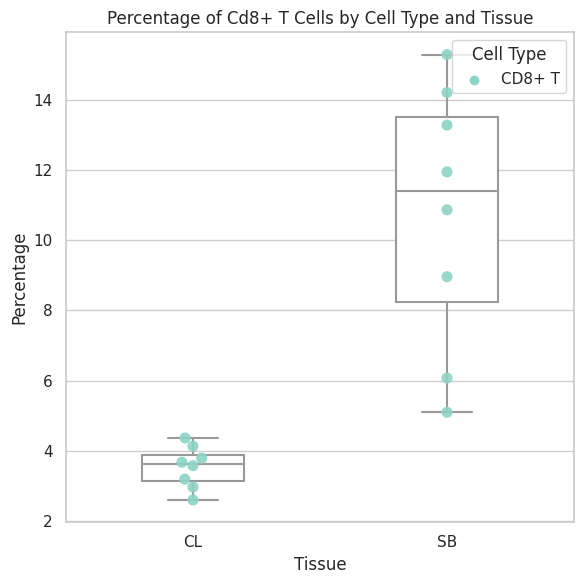

In [ ]:
# Filter the dataset for Cd8+ T cells
cd8_t_cells = df_HuBMAP[df_HuBMAP['Cell Type'] == 'CD8+ T']

# Group the filtered data by tissue and cell type to calculate percentages
percentage_data = cd8_t_cells.groupby(['tissue', 'Cell Type','donor'])['MUC2'].count() / df_HuBMAP.groupby(['tissue','donor'])['MUC2'].count() * 100
percentage_data = percentage_data.reset_index(name='Percentage')

# Create a swarm plot to visualize the percentages
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.swarmplot(
    data=percentage_data,
    x='tissue',
    y='Percentage',
    hue='Cell Type',
    palette='Set3',  # You can choose a different color palette
    marker='o',      # Customize the swarm plot markers
    size=8,           # Customize the size of the markers
    alpha=0.9,       # Adjust transparency of the swarm plot points
)

# Box Plot (Overlayed)
sns.boxplot(
    data=percentage_data,
    x='tissue',
    y='Percentage',
    color='white',
    width=0.4,     # Width of the box plot boxes
    linewidth=1.5,  # Width of the box plot outlines
    showfliers=False  # Exclude outliers from the box plot
)

plt.title("Percentage of Cd8+ T Cells by Cell Type and Tissue")
plt.xlabel("Tissue")
plt.ylabel("Percentage")
plt.legend(title="Cell Type", loc='upper right')
plt.tight_layout()
plt.show()

# Add metadata to data
There are a number of metadata associated with the dataset that can enrich our analysis

In [ ]:
# We can read in the metadata associated with the HuBMAP dataset (From Hickey et al Nature 2023)
data_path = '/content/drive/MyDrive/Research/Collaborations/HUBMAP_Personal/CODEX_data/donor_metadata.csv'
df_metadata = pd.read_csv(data_path, index_col=0)

In [ ]:
# Alternatively if you downloaded from host
df_metadata = pd.read_csv('donor_metadata.csv')

This table is relatively small so we can see the entire table after we have loaded it in

In [ ]:
df_metadata

,B001,B004,B005,B006,B008,B009,B010,B011,B012
Stanford ID,,,,,,,,,
donor age,67,78,24,38,37,30,37,65,24
donor sex,female,male,female,male,male,male,male,female,male
donor race,White,Black,White,White,White,White,White,Black,White
BMI,30.2,35.1,23.2,29,29.3,27.8,24.6,20.5,22.9
History of diabetes,yes,yes,no,no,no,no,no,yes,no
History of cancer,no,no,no,no,no,no,no,no,no
History of hypertension,yes,yes,no,no,yes,no,no,yes,no
History gastrointestinal disease,no,no,no,no,no,no,no,no,no


# Map metadata to Dataframe
Metadata can be mapped to the unique Stanford ID associated. This corresponds to the column `'donor'` in `df_HuBMAP`.

In [ ]:
df_HuBMAP['donor'].unique()

array(['B004', 'B005', 'B006', 'B009', 'B010', 'B011', 'B012', 'B008'],
      dtype=object)

In [ ]:
#Transpose the metadata and rename the column
df_metadataT = df_metadata.T.reset_index()
df_metadataT.rename(columns={'index': 'donor'}, inplace=True)

# Merge the two dataframes based on the 'donor' column
df_merged = df_HuBMAP.merge(df_metadataT, on='donor', how='left')
df_merged

,MUC2,SOX9,MUC1,CD31,Synapto,CD49f,CD15,CHGA,CDX2,ITLN1,...,Tissue Segment,Tissue Unit,donor age,donor sex,donor race,BMI,History of diabetes,History of cancer,History of hypertension,History gastrointestinal disease
0,-0.303994,-0.163727,-0.587608,-0.212903,0.164173,-0.664863,0.049305,0.003616,-0.377532,-0.450794,...,Mucosa,Mucosa,78,male,Black,35.1,yes,no,yes,no
1,-0.301927,-0.491706,-0.500804,-0.243205,-0.142568,-0.664861,-0.182627,-0.117573,-0.182754,-0.236199,...,Mucosa,Mucosa,78,male,Black,35.1,yes,no,yes,no
2,-0.302206,-0.547234,-0.510705,-0.235309,-0.217185,-0.622758,-0.296486,-0.091504,-0.268055,-0.355383,...,Mucosa,Mucosa,78,male,Black,35.1,yes,no,yes,no
3,-0.294644,-0.615593,-0.570580,-0.247548,-0.042246,-0.642230,-0.299031,-0.121458,-0.377533,-0.450797,...,Mucosa,Mucosa,78,male,Black,35.1,yes,no,yes,no
4,-0.298609,-0.272162,-0.587607,-0.228376,-0.266695,-0.664864,-0.237499,-0.121460,-0.168489,-0.430944,...,Mucosa,Mucosa,78,male,Black,35.1,yes,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511997,0.251624,-0.360296,-0.254984,-0.229060,0.154796,-0.218688,-0.350372,-0.112132,-0.142597,-0.352178,...,Subucosa,Muscularis externa,37,male,White,29.3,no,no,yes,no
2511998,-0.274299,-0.465097,-0.367546,-0.210402,-0.204488,-0.259962,-0.333110,-0.103590,-0.213387,-0.342405,...,Subucosa,Muscularis externa,37,male,White,29.3,no,no,yes,no
2511999,-0.260292,-0.397157,-0.352751,-0.200957,0.427470,-0.061012,-0.363492,-0.109572,-0.172711,-0.357500,...,Subucosa,Muscularis externa,37,male,White,29.3,no,no,yes,no
2512000,-0.073782,-0.020896,-0.365204,-0.102411,-0.218278,-0.266579,-0.337989,-0.103707,-0.072134,-0.328749,...,Subucosa,Muscularis externa,37,male,White,29.3,no,no,yes,no


# Inspect Associations with metadata
Now we can inspect the data even further

In [ ]:
# Filter the dataset for M1 Macrophages
M1_cells = df_merged[df_merged['Cell Type'] == 'M1 Macrophage']

# Group the filtered data by tissue and cell type to calculate percentages
percentage_data = M1_cells.groupby(['tissue', 'Cell Type','donor'])['MUC2'].count() / df_HuBMAP.groupby(['tissue','donor'])['MUC2'].count() * 100
percentage_data = percentage_data.reset_index(name='Percentage')

df_meta_cell = percentage_data.merge(df_metadataT, on='donor', how='left')

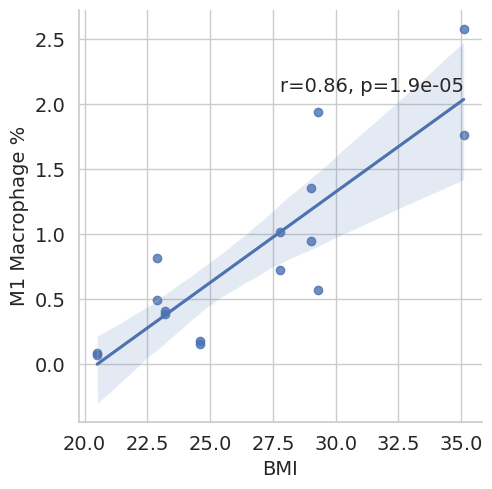

In [ ]:
# convert BMI to numeric
df_meta_cell['BMI'] = pd.to_numeric(df_meta_cell['BMI'], errors='coerce')

# Create the lmplot
g = sns.lmplot(x='BMI', y='Percentage', data=df_meta_cell, height=5, aspect=1)

# Define a function to annotate the plot with correlation coefficient and p-value
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['BMI'], data['Percentage'])
    ax = plt.gca()
    ax.text(0.5, 0.8, f'r={r:.2f}, p={p:.2g}', transform=ax.transAxes, fontsize=14)

# Apply the annotate function to the lmplot
g.map_dataframe(annotate)

# Customize the plot labels and fonts
plt.xlabel('BMI', fontsize=14)
plt.ylabel('M1 Macrophage %', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

## Plot the data

In [ ]:
def catplot2(df, hue, exp='Exp', X='X', Y='Y', invert_y=False, size=3, legend=True, palette="bright", figsize=5, style='white', exps=None, axis='on', scatter_kws={}):
    '''
    Plots cells in a tissue section color-coded by either cell type or node allocation.
    df:  dataframe with cell information
    size:  size of points to plot for each cell.
    hue:  color by "Clusterid" or "Node," respectively.
    legend:  include a legend in the plot.
    '''

    # Define default scatterplot keyword arguments
    scatter_kws_ = {'s': size, 'alpha': 1}
    scatter_kws_.update(scatter_kws)

    figures = []  # A list to store plot figures
    df = df.rename(columns=lambda x: str(x))  # Rename DataFrame columns

    # Ensure the 'hue' column is treated as a categorical variable
    df[hue] = df[hue].astype("category")

    if invert_y:
        # If 'invert_y' is True, invert the Y-values
        y_orig = df[Y].values.copy()
        df[Y] *= -1

    style = {'axes.facecolor': style}
    sns.set_style(style)

    if exps is None:
        exps = list(df[exp].unique())  # Display all experiments if 'exps' is not specified
    elif not isinstance(exps, list):
        exps = [exps]  # Ensure 'exps' is a list

    for name in exps:
        data = df[df[exp] == name]  # Filter data for the specified experiment

        print(name)  # Print the name of the current experiment

        # Create a scatterplot (lmplot) using Seaborn
        f = sns.lmplot(x=X, y=Y, data=data, hue=hue,
                       legend=legend, fit_reg=False, markers='.', height=figsize, palette=palette, scatter=True, scatter_kws=scatter_kws_)

        if axis == 'off':
            # If 'axis' is 'off', remove axis lines and labels
            sns.despine(top=True, right=True, left=True, bottom=True)
            f = f.set(xticks=[], yticks=[]).set_xlabels('').set_ylabels('')

        plt.title(name)  # Set the title of the plot

        plt.show()  # Display the plot
        figures += [f]  # Add the plot figure to the list

    if invert_y:
        df[Y] = y_orig  # Restore the original Y-values if 'invert_y' was used

    return figures


In [ ]:
def catplot(df, hue, exp='Exp', X='X', Y='Y', invert_y=False, size=3, legend=True, palette='bright', figsize=5, style='white', exps=None, axis='on', scatter_kws={}, **kwargs):
    '''
    Plots cells in tissue section color coded by either cell type or node allocation.
    df:  dataframe with cell information
    size:  size of point to plot for each cell.
    hue:  color by "Clusterid" or "Node" respectively.
    legend:  to include legend in the plot.
    '''

    # Set default parameters for scatter plots
    scatter_kws_ = {'s': size, 'alpha': 1}
    scatter_kws_.update(scatter_kws)

    figures = []  # List to store plot figures
    df = df.rename(columns=lambda x: str(x))  # Ensure column names are strings

    df[hue] = df[hue].astype('category')  # Convert the hue column to a category
    if invert_y:
        y_orig = df[Y].values.copy()
        df[Y] *= -1

    # Set Seaborn style
    style = {'axes.facecolor': style}
    sns.set_style(style)

    if exps is None:
        exps = list(df[exp].unique())  # Display all experiments if not specified
    elif not isinstance(exps, list):
        exps = [exps]

    for name in exps:
        data = df[df[exp] == name]

        data[X] = data[X] - data[X].min()  # Normalize X coordinates
        data[Y] = data[Y] - data[Y].min()  # Normalize Y coordinates

        xrange = data[X].max() - data[X].min()
        yrange = data[Y].max() - data[Y].min()

        # Create a scatter plot using Seaborn's lmplot
        f = sns.lmplot(x=X, y=Y, data=data, hue=hue,
                       legend=legend, fit_reg=False, markers='.', height=yrange / 400, palette=palette, scatter=True, scatter_kws=scatter_kws_, aspect=xrange / yrange, **kwargs)

        if axis == 'off':
            sns.despine(top=True, right=True, left=True, bottom=True)
            f = f.set(xticks=[], yticks=[]).set_xlabels('').set_ylabels('')

        plt.title(name)  # Set the plot title
        plt.show()
        figures += [f]

    if invert_y:
        df[Y] = y_orig  # Restore the original Y values

    return figures

In [ ]:
color_list = [
    'blue', 'red', 'yellow', 'magenta', 'orange', 'green', 'brown', 'black',
    'gray', 'skyblue', 'gold', 'plum', 'yellowgreen', 'tan', 'navy', 'bisque',
    'goldenrod', 'blueviolet', 'darkorange', 'teal', 'olive', 'dimgray',
    'indigo', 'lightcoral', 'cyan', 'ivory', 'beige', 'darkblue', 'lightcyan',
    'royalblue'
]
cell_list = list(df_HuBMAP['Cell Type'].unique())
dict_cell = dict(zip(cell_list, color_list))
dict_cell

{'NK': 'blue',
 'Enterocyte': 'red',
 'MUC1+ Enterocyte': 'yellow',
 'TA': 'magenta',
 'CD66+ Enterocyte': 'orange',
 'Paneth': 'green',
 'Smooth muscle': 'brown',
 'M1 Macrophage': 'black',
 'Goblet': 'gray',
 'Neuroendocrine': 'skyblue',
 'CD57+ Enterocyte': 'gold',
 'Lymphatic': 'plum',
 'CD8+ T': 'yellowgreen',
 'DC': 'tan',
 'M2 Macrophage': 'navy',
 'B': 'bisque',
 'Neutrophil': 'goldenrod',
 'Endothelial': 'blueviolet',
 'Cycling TA': 'darkorange',
 'Plasma': 'teal',
 'CD4+ T cell': 'olive',
 'Stroma': 'dimgray',
 'Nerve': 'indigo',
 'ICC': 'lightcoral',
 'CD7+ Immune': 'cyan'}

In [ ]:
catplot2(df = df_HuBMAP.loc[df_HuBMAP['donor']=='B010'], hue = 'Cell Type', exp='unique_region', X='x', Y='y',
        invert_y=False, size=3, legend=True, palette=dict_cell, figsize=5,
        style='white', exps=None, axis='on', scatter_kws={})

In [ ]:
catplot(df = df_HuBMAP.loc[df_HuBMAP['donor']=='B010'], hue = 'Cell Type', exp='unique_region', X='x', Y='y',
        invert_y=False, size=3, legend=True, palette=dict_cell, figsize=5,
        style='white', exps=None, axis='on', scatter_kws={})

## Look at specific areas for analysis

In [ ]:
df_HuBMAP['Tissue Segment'].unique()

array(['Mucosa', 'Subucosa', 'Muscle'], dtype=object)

In [ ]:
df_mucosa = df_HuBMAP.loc[df_HuBMAP['Tissue Segment']=='Mucosa']
df_mucosa


,MUC2,SOX9,MUC1,CD31,Synapto,CD49f,CD15,CHGA,CDX2,ITLN1,...,machine,MUC6,Neighborhood,Neighborhood_Ind,Neigh_sub,NeighInd_sub,Community,Major Community,Tissue Segment,Tissue Unit
0,-0.303994,-0.163727,-0.587608,-0.212903,0.164173,-0.664863,0.049305,0.003616,-0.377532,-0.450794,...,NaN,NaN,Mature Epithelial,Mature Epithelial,Epithelial,Epithelial,Plasma Cell Enriched,Immune,Mucosa,Mucosa
1,-0.301927,-0.491706,-0.500804,-0.243205,-0.142568,-0.664861,-0.182627,-0.117573,-0.182754,-0.236199,...,NaN,NaN,Transit Amplifying Zone,Mature Epithelial,Epithelial,Epithelial,Mature Epithelial,Epithelial,Mucosa,Mucosa
2,-0.302206,-0.547234,-0.510705,-0.235309,-0.217185,-0.622758,-0.296486,-0.091504,-0.268055,-0.355383,...,NaN,NaN,Innate Immune Enriched,Innate Immune Enriched,Immune,Immune,Innate Immune Enriched,Immune,Mucosa,Mucosa
3,-0.294644,-0.615593,-0.570580,-0.247548,-0.042246,-0.642230,-0.299031,-0.121458,-0.377533,-0.450797,...,NaN,NaN,Outer Follicle,Outer Follicle,Immune,Immune,Follicle,Immune,Mucosa,Mucosa
4,-0.298609,-0.272162,-0.587607,-0.228376,-0.266695,-0.664864,-0.237499,-0.121460,-0.168489,-0.430944,...,NaN,NaN,Outer Follicle,Outer Follicle,Immune,Immune,Follicle,Immune,Mucosa,Mucosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916803,0.351916,0.693827,-0.081489,-0.240643,0.008875,0.143445,0.373710,-0.097896,0.869830,0.579653,...,Skywalker,NaN,CD66+ Mature Epithelial,CD66+ Mature Epithelial,Epithelial,Epithelial,Secretory Epithelial,Epithelial,Mucosa,Mucosa
1916804,0.233642,0.171892,0.141842,-0.236145,-0.097772,-0.099283,0.626185,-0.105545,0.092076,0.682969,...,Skywalker,NaN,CD66+ Mature Epithelial,CD66+ Mature Epithelial,Epithelial,Epithelial,Secretory Epithelial,Epithelial,Mucosa,Mucosa
1916805,-0.212237,-0.280904,-0.197833,-0.245638,-0.152563,-0.125035,0.430416,-0.105787,-0.038327,-0.173319,...,Skywalker,NaN,CD8+ T Enriched IEL,CD8+ T Enriched IEL,Immune,Immune,Mature Epithelial,Epithelial,Mucosa,Mucosa
1916806,-0.328666,0.607609,-0.180362,-0.247351,-0.143742,-0.169576,1.095596,-0.113879,0.370160,-0.133272,...,Skywalker,NaN,Transit Amplifying Zone,Mature Epithelial,Epithelial,Epithelial,CD66+ Mature Epithelial,Epithelial,Mucosa,Mucosa


In [ ]:
def area_plot(data, per_cat, grouping, cell_list,color_dict=None, norm=True, save_name=None, col_order=None, name_cat = 'Cell Type',fig_sizing=(8,4)):
    if col_order is None:
        col_order=list(data[grouping].unique())

    cell_list_1 = cell_list.copy()
    #Find Percentage of cell type
    test= data.copy()
    if norm==True:
        test1 = test.loc[test[per_cat].isin(cell_list_1)]
    else:
        test1 = test.copy()
    test1[per_cat] = test1[per_cat].astype('category')
    test_freq = test1.groupby(grouping).apply(lambda x: x[per_cat].value_counts(normalize = True,sort = False)*100)
    test_freq.columns = test_freq.columns.astype(str)

    ##### Can subset it here if I do not want normalized per the group
    test_freq.reset_index(inplace=True)
    cell_list_1.append(grouping)
    test_freq = test_freq[cell_list_1]
    melt_test = pd.melt(test_freq, id_vars=[grouping])#, value_vars=test_freq.columns)
    melt_test.rename(columns = {per_cat: name_cat, 'value':'percent'},  inplace = True)

    #Set up for plotting
    melt_test_piv = pd.pivot_table(melt_test, columns = [name_cat], index=[grouping], values=['percent'])
    melt_test_piv.columns = melt_test_piv.columns.droplevel(0)
    melt_test_piv.reset_index(inplace=True)
    melt_test_piv.set_index(grouping, inplace=True)
    melt_test_piv = melt_test_piv.reindex(col_order)
    col_order2 = melt_test_piv.mean().sort_values(ascending=False).index.to_list()
    melt_test_piv= melt_test_piv[col_order2]

    #Get color dictionary
    if color_dict is None:
        cond_list = melt_test_piv.columns.to_list()
        color_list=list(pal_temp.values())
        color_dict = dict(zip(cond_list, color_list))

    #first subplot
    ax1 = melt_test_piv.plot.area(alpha = 0.8, linewidth=1, color=[color_dict.get(x) for x in melt_test_piv.columns], figsize =fig_sizing, rot=90)
    for line in ax1.lines:
        line.set_color('black')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_ylabel('percent')
    #ax1.spines['left'].set_position(('data', 1.0))
    #ax1.set_xticks(np.arange(1,melt_test.day.max()+1,1))
    #ax1.set_ylim([0, int(ceil(max(max(melt_test_piv.sum(axis=1)), max(tm_piv.sum(axis=1)))))])

    lgd2 = ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
    if save_name:
        plt.savefig(save_path+save_name+'_t_piv_celltype_percent.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
   return melt_test_piv

In [ ]:
df_mucosa['Tissue_location'].unique()


array(['Ascending', 'Descending', 'Duodenum', 'Ileum', 'Mid-jejunum',
       'Proximal Jejunum', 'Descending - Sigmoid', 'Transverse'],
      dtype=object)

In [ ]:
df_mucosa

In [ ]:
df_mucosa['Cell subtype'].unique()



array(['Immune', 'Epithelial', 'Stromal'], dtype=object)

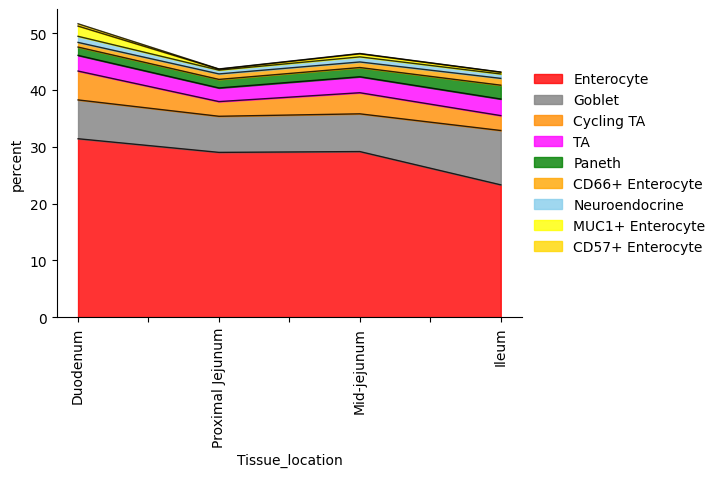

In [ ]:
#Total
cell_list = list(df_mucosa.loc[df_mucosa['Cell subtype']=='Epithelial']['Cell Type'].unique())

col_order_list = [ 'Duodenum', 'Proximal Jejunum', 'Mid-jejunum','Ileum']#,'Ascending','Transverse','Descending', 'Descending - Sigmoid']

out_per = area_plot(data = df_mucosa, per_cat = 'Cell Type', grouping = 'Tissue_location', color_dict = dict_cell,\
          cell_list=cell_list, fig_sizing=(6,4), norm=False, col_order=col_order_list, save_name=None)

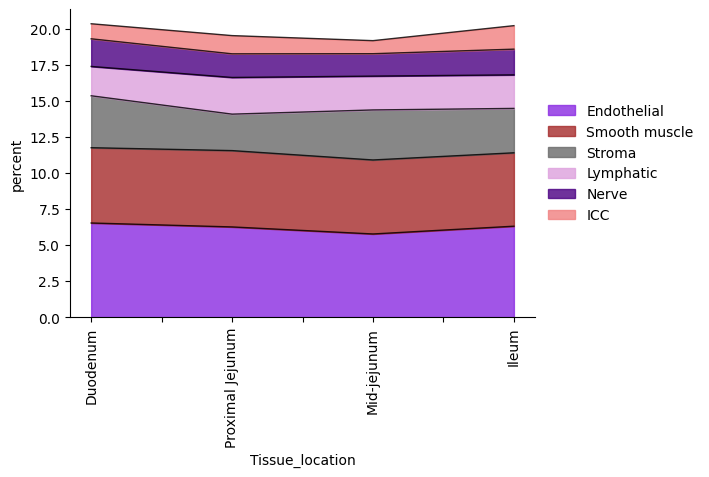

In [ ]:
#Total
cell_list = list(df_mucosa.loc[df_mucosa['Cell subtype']=='Stromal']['Cell Type'].unique())

col_order_list = [ 'Duodenum', 'Proximal Jejunum', 'Mid-jejunum','Ileum']#,'Ascending','Transverse','Descending', 'Descending - Sigmoid']

out_per = area_plot(data = df_mucosa, per_cat = 'Cell Type', grouping = 'Tissue_location', color_dict = dict_cell,\
          cell_list=cell_list, fig_sizing=(6,4), norm=False, col_order=col_order_list, save_name=None)

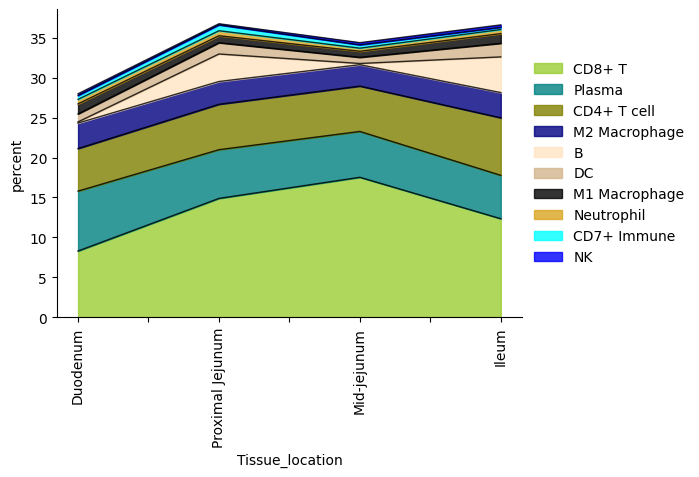

In [ ]:
#Total
cell_list = list(df_mucosa.loc[df_mucosa['Cell subtype']=='Immune']['Cell Type'].unique())

col_order_list = [ 'Duodenum', 'Proximal Jejunum', 'Mid-jejunum','Ileum']#,'Ascending','Transverse','Descending', 'Descending - Sigmoid']

out_per = area_plot(data = df_mucosa, per_cat = 'Cell Type', grouping = 'Tissue_location', color_dict = dict_cell,\
          cell_list=cell_list, fig_sizing=(6,4), norm=False, col_order=col_order_list, save_name=None)

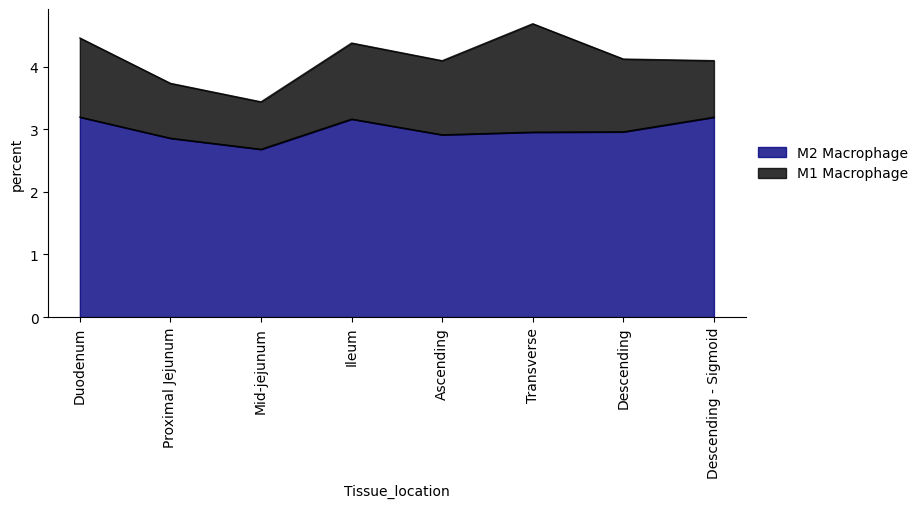

In [ ]:
#Total
cell_list = ['M1 Macrophage','M2 Macrophage']

col_order_list = [ 'Duodenum', 'Proximal Jejunum', 'Mid-jejunum','Ileum','Ascending','Transverse','Descending', 'Descending - Sigmoid']

out_per = area_plot(data = df_mucosa, per_cat = 'Cell Type', grouping = 'Tissue_location', color_dict = dict_cell,\
          cell_list=cell_list, fig_sizing=(9,4), norm=False, col_order=col_order_list, save_name=None)

In [ ]:
df_mucosa['Community'].unique()

array(['Plasma Cell Enriched', 'Mature Epithelial',
       'Innate Immune Enriched', 'Follicle', 'Adaptive Immune Enriched',
       'Secretory Epithelial', 'CD66+ Mature Epithelial',
       'CD8+ T Enriched IEL'], dtype=object)

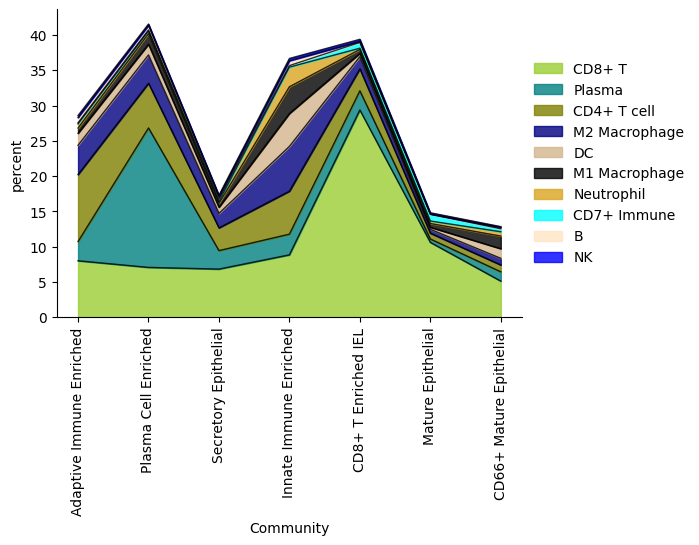

In [ ]:
#Total
cell_list = list(df_mucosa.loc[df_mucosa['Cell subtype']=='Immune']['Cell Type'].unique())

col_order_list = ['Adaptive Immune Enriched', 'Plasma Cell Enriched', 'Secretory Epithelial', 'Innate Immune Enriched', \
                   'CD8+ T Enriched IEL', 'Mature Epithelial', 'CD66+ Mature Epithelial']#,'Ascending','Transverse','Descending', 'Descending - Sigmoid']

out_per = area_plot(data = df_mucosa, per_cat = 'Cell Type', grouping = 'Community', color_dict = dict_cell,\
          cell_list=cell_list, fig_sizing=(6,4), norm=False, col_order=col_order_list, save_name=None)

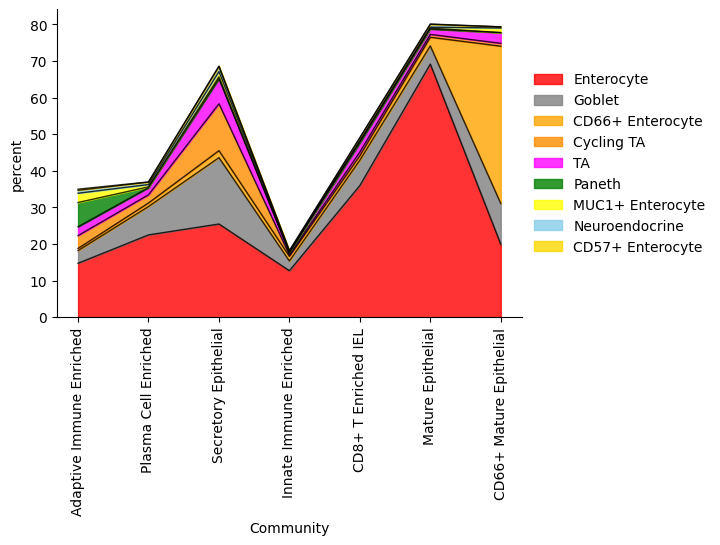

In [ ]:
#Total
cell_list = list(df_mucosa.loc[df_mucosa['Cell subtype']=='Epithelial']['Cell Type'].unique())

col_order_list = ['Adaptive Immune Enriched', 'Plasma Cell Enriched', 'Secretory Epithelial', 'Innate Immune Enriched', \
                   'CD8+ T Enriched IEL', 'Mature Epithelial', 'CD66+ Mature Epithelial']#,'Ascending','Transverse','Descending', 'Descending - Sigmoid']

out_per = area_plot(data = df_mucosa, per_cat = 'Cell Type', grouping = 'Community', color_dict = dict_cell,\
          cell_list=cell_list, fig_sizing=(6,4), norm=False, col_order=col_order_list, save_name=None)

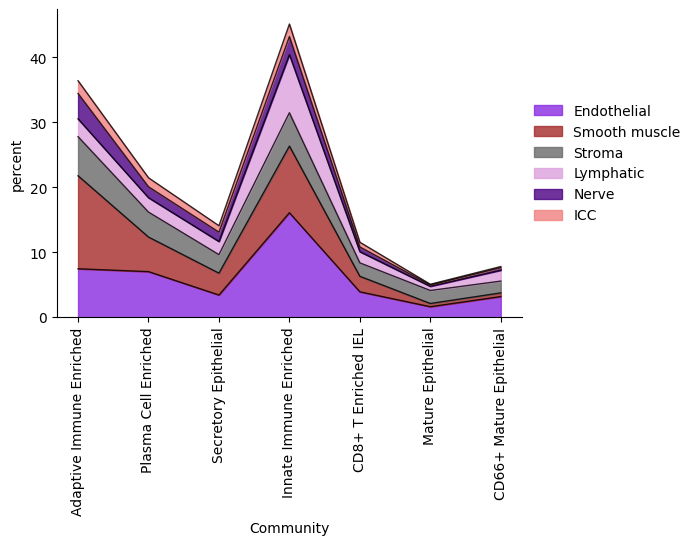

In [ ]:
#Total
cell_list = list(df_mucosa.loc[df_mucosa['Cell subtype']=='Stromal']['Cell Type'].unique())

col_order_list = ['Adaptive Immune Enriched', 'Plasma Cell Enriched', 'Secretory Epithelial', 'Innate Immune Enriched', \
                   'CD8+ T Enriched IEL', 'Mature Epithelial', 'CD66+ Mature Epithelial']#,'Ascending','Transverse','Descending', 'Descending - Sigmoid']

out_per = area_plot(data = df_mucosa, per_cat = 'Cell Type', grouping = 'Community', color_dict = dict_cell,\
          cell_list=cell_list, fig_sizing=(6,4), norm=False, col_order=col_order_list, save_name=None)